In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Set Style
sns.set(style="whitegrid", palette="muted")

# load data from SQLite
conn = sqlite3.connect("../data/superstore.db")
df = pd.read_sql_query("SELECT * FROM sales", conn)

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# check column names and data types
df.info()

# check for missing values
df.isnull().sum()

# check for duplicates
df.duplicated().sum()

# convert order date and ship date to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

C:\Users\pesan\AppData\Local\Temp\ipykernel_26848\3165684440.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Category", y="Sales", estimator=sum, ci=None)


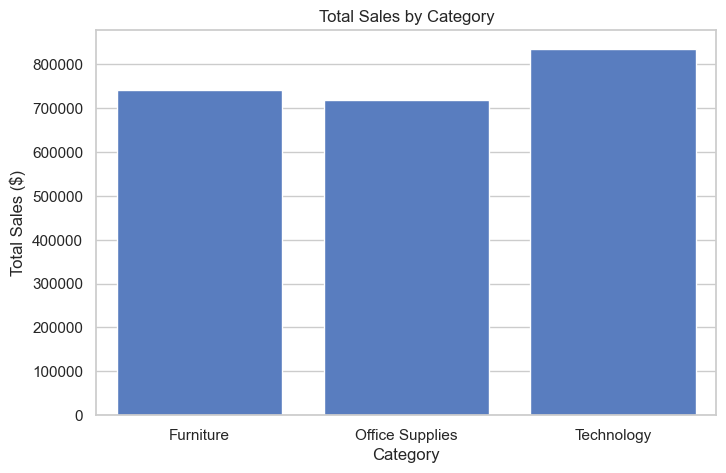

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Category", y="Sales", estimator=sum, ci=None)   
plt.title("Total Sales by Category")
plt.ylabel("Total Sales ($)")
plt.show()


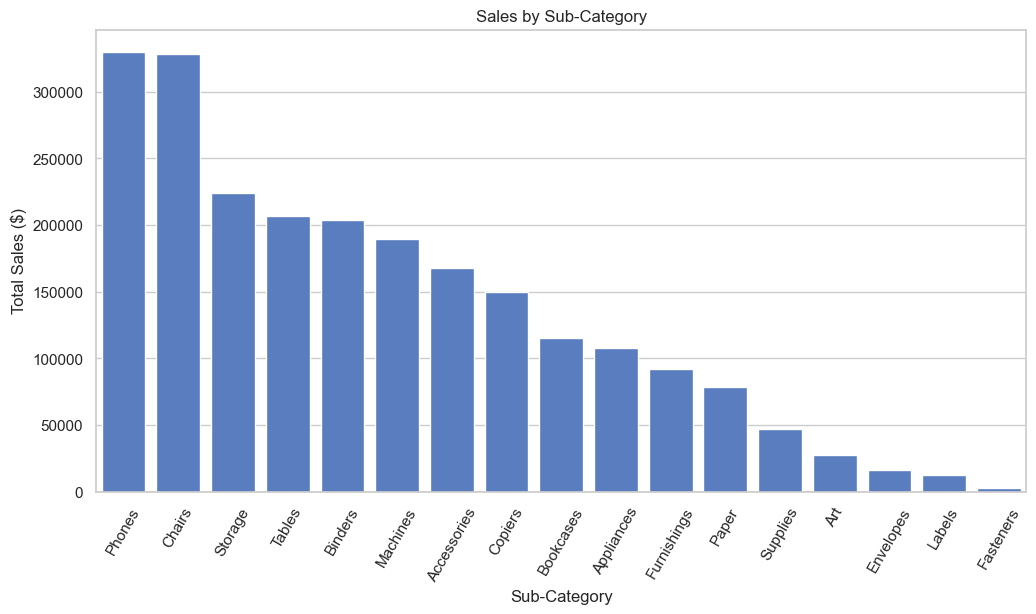

In [18]:
plt.figure(figsize=(12,6))
subcat_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
sns.barplot(x=subcat_sales.index, y=subcat_sales.values)
plt.title("Sales by Sub-Category")
plt.xticks(rotation=60)
plt.ylabel("Total Sales ($)")
plt.show()

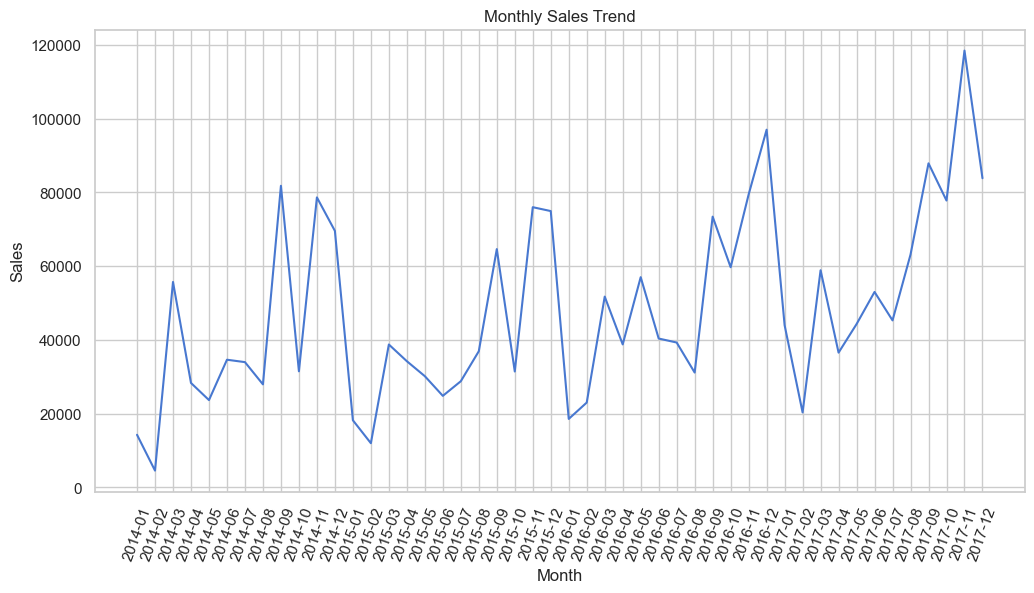

In [9]:
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["YearMonth"] = df["Order Date"].dt.to_period("M").astype(str)
monthly_sales = df.groupby("YearMonth")["Sales"].sum().reset_index()

plt.figure(figsize = (12,6))
sns.lineplot(data=monthly_sales, x="YearMonth", y="Sales")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation = 70)
plt.show()

C:\Users\pesan\AppData\Local\Temp\ipykernel_6316\2786350548.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Region", y="Profit", estimator=sum, ci=None)


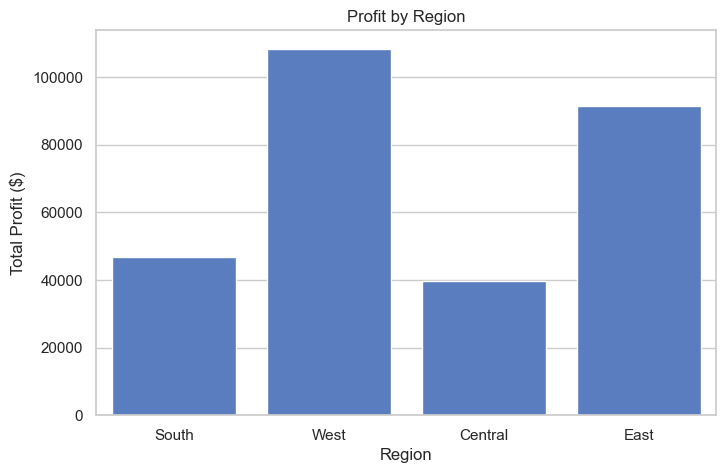

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Region", y="Profit", estimator=sum, ci=None)
plt.title("Profit by Region")
plt.ylabel("Total Profit ($)")
plt.show()

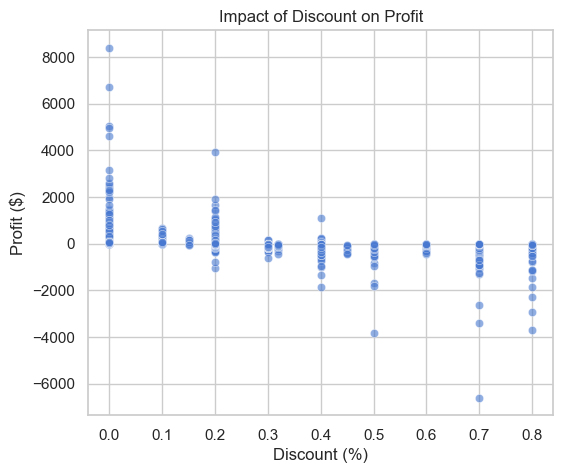

In [8]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.6)
plt.title("Impact of Discount on Profit")
plt.ylabel("Profit ($)")
plt.xlabel("Discount (%)")
plt.show()

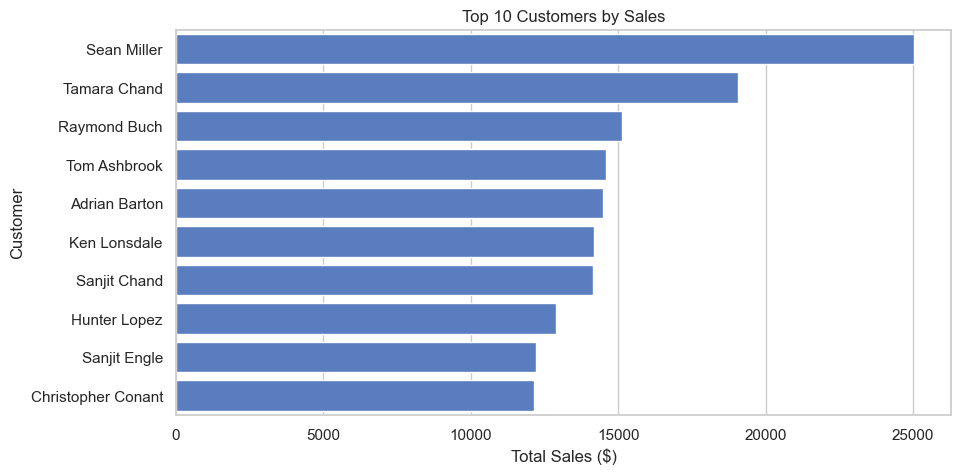

In [9]:
top_customer = (
    df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customer.values, y=top_customer.index)
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Customer")
plt.show()


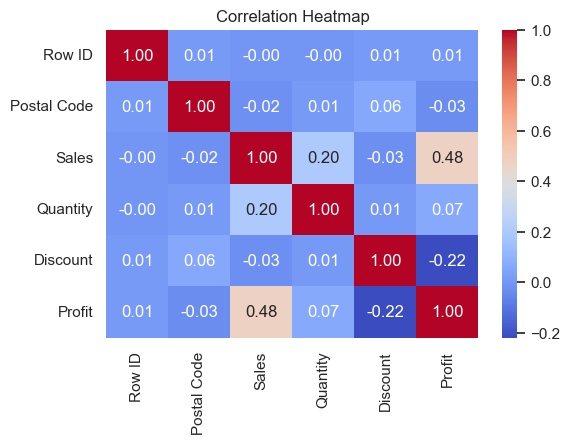

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
df.to_csv("../data/superstore_clean.csv", index=False)
print("Cleaned dataset saved as superstore_clean.csv")

Cleaned dataset saved as superstore_clean.csv
